In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

president_data = pd.read_csv('/Users/alessandro/Desktop/ANALYTICS/USAED/1976_2020_president.csv')

In [206]:
# Database of US Presidential elecions by State from 1976 to 2020

president_data

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


In [207]:
# Dataset info

president_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


In [208]:
# Function to find the winner party per Year per State

def whowon(data):
    i = 0
    winnerlist = []
    while(i < len(data)):
        data_filtered = data[(data.state == data.state[i]) & (data.year == data.year[i])]
        data_sorted = data_filtered.sort_values('candidatevotes', ascending=False).reset_index(drop=True)
        winner = data_sorted['party_simplified'][0]
        winnerlist.append(winner)
        i += 1
    return winnerlist


In [209]:
# Calculation of the winner party and adding result in new column

party_winner = whowon(president_data)

president_data['party_winner'] = party_winner
president_data

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,party_winner
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,DEMOCRAT
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,DEMOCRAT
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,DEMOCRAT
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,DEMOCRAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN,REPUBLICAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER,REPUBLICAN
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER,REPUBLICAN
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER,REPUBLICAN


In [210]:
# New table with only the relevant columns

p_table1 = president_data[['year', 'state', 'candidatevotes', 'totalvotes', 'party_winner']].copy()
p_table1

,year,state,candidatevotes,totalvotes,party_winner
0,1976,ALABAMA,659170,1182850,DEMOCRAT
1,1976,ALABAMA,504070,1182850,DEMOCRAT
2,1976,ALABAMA,9198,1182850,DEMOCRAT
3,1976,ALABAMA,6669,1182850,DEMOCRAT
4,1976,ALABAMA,1954,1182850,DEMOCRAT
...,...,...,...,...,...
4282,2020,WYOMING,5768,278503,REPUBLICAN
4283,2020,WYOMING,2208,278503,REPUBLICAN
4284,2020,WYOMING,1739,278503,REPUBLICAN
4285,2020,WYOMING,279,278503,REPUBLICAN


In [211]:
# Grouping by the winner candidate

president_grouped = p_table1.groupby(['year', 'state','party_winner', 'totalvotes'])[['candidatevotes']].max().reset_index()
president_grouped

,year,state,party_winner,totalvotes,candidatevotes
0,1976,ALABAMA,DEMOCRAT,1182850,659170
1,1976,ALASKA,REPUBLICAN,123574,71555
2,1976,ARIZONA,REPUBLICAN,742719,418642
3,1976,ARKANSAS,DEMOCRAT,767535,498604
4,1976,CALIFORNIA,REPUBLICAN,7803770,3882244
...,...,...,...,...,...
607,2020,VIRGINIA,DEMOCRAT,4460524,2413568
608,2020,WASHINGTON,DEMOCRAT,4087631,2369612
609,2020,WEST VIRGINIA,REPUBLICAN,794652,545382
610,2020,WISCONSIN,DEMOCRAT,3298041,1630866


In [212]:
# Adding the victory percentage

president_grouped['victory_percentage'] = (president_grouped.candidatevotes / president_grouped.totalvotes)*100
president_grouped

,year,state,party_winner,totalvotes,candidatevotes,victory_percentage
0,1976,ALABAMA,DEMOCRAT,1182850,659170,55.727269
1,1976,ALASKA,REPUBLICAN,123574,71555,57.904575
2,1976,ARIZONA,REPUBLICAN,742719,418642,56.366136
3,1976,ARKANSAS,DEMOCRAT,767535,498604,64.961728
4,1976,CALIFORNIA,REPUBLICAN,7803770,3882244,49.748314
...,...,...,...,...,...,...
607,2020,VIRGINIA,DEMOCRAT,4460524,2413568,54.109517
608,2020,WASHINGTON,DEMOCRAT,4087631,2369612,57.970301
609,2020,WEST VIRGINIA,REPUBLICAN,794652,545382,68.631552
610,2020,WISCONSIN,DEMOCRAT,3298041,1630866,49.449537


In [213]:
# Function to calculate if the winner party changed from the previous election

def pwinner(data):
    i = 0
    pwinnerlist = []
    while(i < len(data)):
        if(i <= 51):
            pwinner = np.nan 
        else:
            pwinner = data['party_winner'][i - 51]
        pwinnerlist.append(pwinner)
        i += 1
    return (pwinnerlist)



In [214]:
# Adding results as new column

president_grouped['previous_winner'] = pwinner(president_grouped)
president_grouped

,year,state,party_winner,totalvotes,candidatevotes,victory_percentage,previous_winner
0,1976,ALABAMA,DEMOCRAT,1182850,659170,55.727269,NaN
1,1976,ALASKA,REPUBLICAN,123574,71555,57.904575,NaN
2,1976,ARIZONA,REPUBLICAN,742719,418642,56.366136,NaN
3,1976,ARKANSAS,DEMOCRAT,767535,498604,64.961728,NaN
4,1976,CALIFORNIA,REPUBLICAN,7803770,3882244,49.748314,NaN
...,...,...,...,...,...,...,...
607,2020,VIRGINIA,DEMOCRAT,4460524,2413568,54.109517,DEMOCRAT
608,2020,WASHINGTON,DEMOCRAT,4087631,2369612,57.970301,DEMOCRAT
609,2020,WEST VIRGINIA,REPUBLICAN,794652,545382,68.631552,REPUBLICAN
610,2020,WISCONSIN,DEMOCRAT,3298041,1630866,49.449537,REPUBLICAN


In [215]:
# Adding new column to show if the winner changed from previous election

president_grouped['changed_winner'] = president_grouped.party_winner != president_grouped.previous_winner
president_grouped

,year,state,party_winner,totalvotes,candidatevotes,victory_percentage,previous_winner,changed_winner
0,1976,ALABAMA,DEMOCRAT,1182850,659170,55.727269,NaN,True
1,1976,ALASKA,REPUBLICAN,123574,71555,57.904575,NaN,True
2,1976,ARIZONA,REPUBLICAN,742719,418642,56.366136,NaN,True
3,1976,ARKANSAS,DEMOCRAT,767535,498604,64.961728,NaN,True
4,1976,CALIFORNIA,REPUBLICAN,7803770,3882244,49.748314,NaN,True
...,...,...,...,...,...,...,...,...
607,2020,VIRGINIA,DEMOCRAT,4460524,2413568,54.109517,DEMOCRAT,False
608,2020,WASHINGTON,DEMOCRAT,4087631,2369612,57.970301,DEMOCRAT,False
609,2020,WEST VIRGINIA,REPUBLICAN,794652,545382,68.631552,REPUBLICAN,False
610,2020,WISCONSIN,DEMOCRAT,3298041,1630866,49.449537,REPUBLICAN,True


In [216]:
# Adjusting table

p_data = president_grouped[['year', 'state', 'party_winner', 'candidatevotes', 'totalvotes', 'victory_percentage',
                             'previous_winner', 'changed_winner']].copy()
p_data

,year,state,party_winner,candidatevotes,totalvotes,victory_percentage,previous_winner,changed_winner
0,1976,ALABAMA,DEMOCRAT,659170,1182850,55.727269,NaN,True
1,1976,ALASKA,REPUBLICAN,71555,123574,57.904575,NaN,True
2,1976,ARIZONA,REPUBLICAN,418642,742719,56.366136,NaN,True
3,1976,ARKANSAS,DEMOCRAT,498604,767535,64.961728,NaN,True
4,1976,CALIFORNIA,REPUBLICAN,3882244,7803770,49.748314,NaN,True
...,...,...,...,...,...,...,...,...
607,2020,VIRGINIA,DEMOCRAT,2413568,4460524,54.109517,DEMOCRAT,False
608,2020,WASHINGTON,DEMOCRAT,2369612,4087631,57.970301,DEMOCRAT,False
609,2020,WEST VIRGINIA,REPUBLICAN,545382,794652,68.631552,REPUBLICAN,False
610,2020,WISCONSIN,DEMOCRAT,1630866,3298041,49.449537,REPUBLICAN,True


In [217]:
# Adding two rows to indicate if one party won (useful for calculation)

p_data['rep_win'] = president_grouped.party_winner == 'REPUBLICAN'
p_data['dem_win'] = president_grouped.party_winner == 'DEMOCRAT'
p_data

,year,state,party_winner,candidatevotes,totalvotes,victory_percentage,previous_winner,changed_winner,rep_win,dem_win
0,1976,ALABAMA,DEMOCRAT,659170,1182850,55.727269,NaN,True,False,True
1,1976,ALASKA,REPUBLICAN,71555,123574,57.904575,NaN,True,True,False
2,1976,ARIZONA,REPUBLICAN,418642,742719,56.366136,NaN,True,True,False
3,1976,ARKANSAS,DEMOCRAT,498604,767535,64.961728,NaN,True,False,True
4,1976,CALIFORNIA,REPUBLICAN,3882244,7803770,49.748314,NaN,True,True,False
...,...,...,...,...,...,...,...,...,...,...
607,2020,VIRGINIA,DEMOCRAT,2413568,4460524,54.109517,DEMOCRAT,False,False,True
608,2020,WASHINGTON,DEMOCRAT,2369612,4087631,57.970301,DEMOCRAT,False,False,True
609,2020,WEST VIRGINIA,REPUBLICAN,545382,794652,68.631552,REPUBLICAN,False,True,False
610,2020,WISCONSIN,DEMOCRAT,1630866,3298041,49.449537,REPUBLICAN,True,False,True


In [218]:
# States that changed the winner party most times (1976 - 2020)

p_data_g1 = p_data.groupby(['state'])[['changed_winner']].sum().reset_index()
p_data_g1 = p_data_g1.sort_values(by='changed_winner', ascending=False).reset_index(drop = True)
#p_data_g1 = p_data_g1.head(15)
p_data_g1

,state,changed_winner
0,OHIO,6
1,FLORIDA,6
2,GEORGIA,5
3,WISCONSIN,5
4,IOWA,5
5,PENNSYLVANIA,5
6,NEVADA,4
7,TENNESSEE,4
8,LOUISIANA,4
9,KENTUCKY,4


<Axes: xlabel='changed_winner', ylabel='state'>

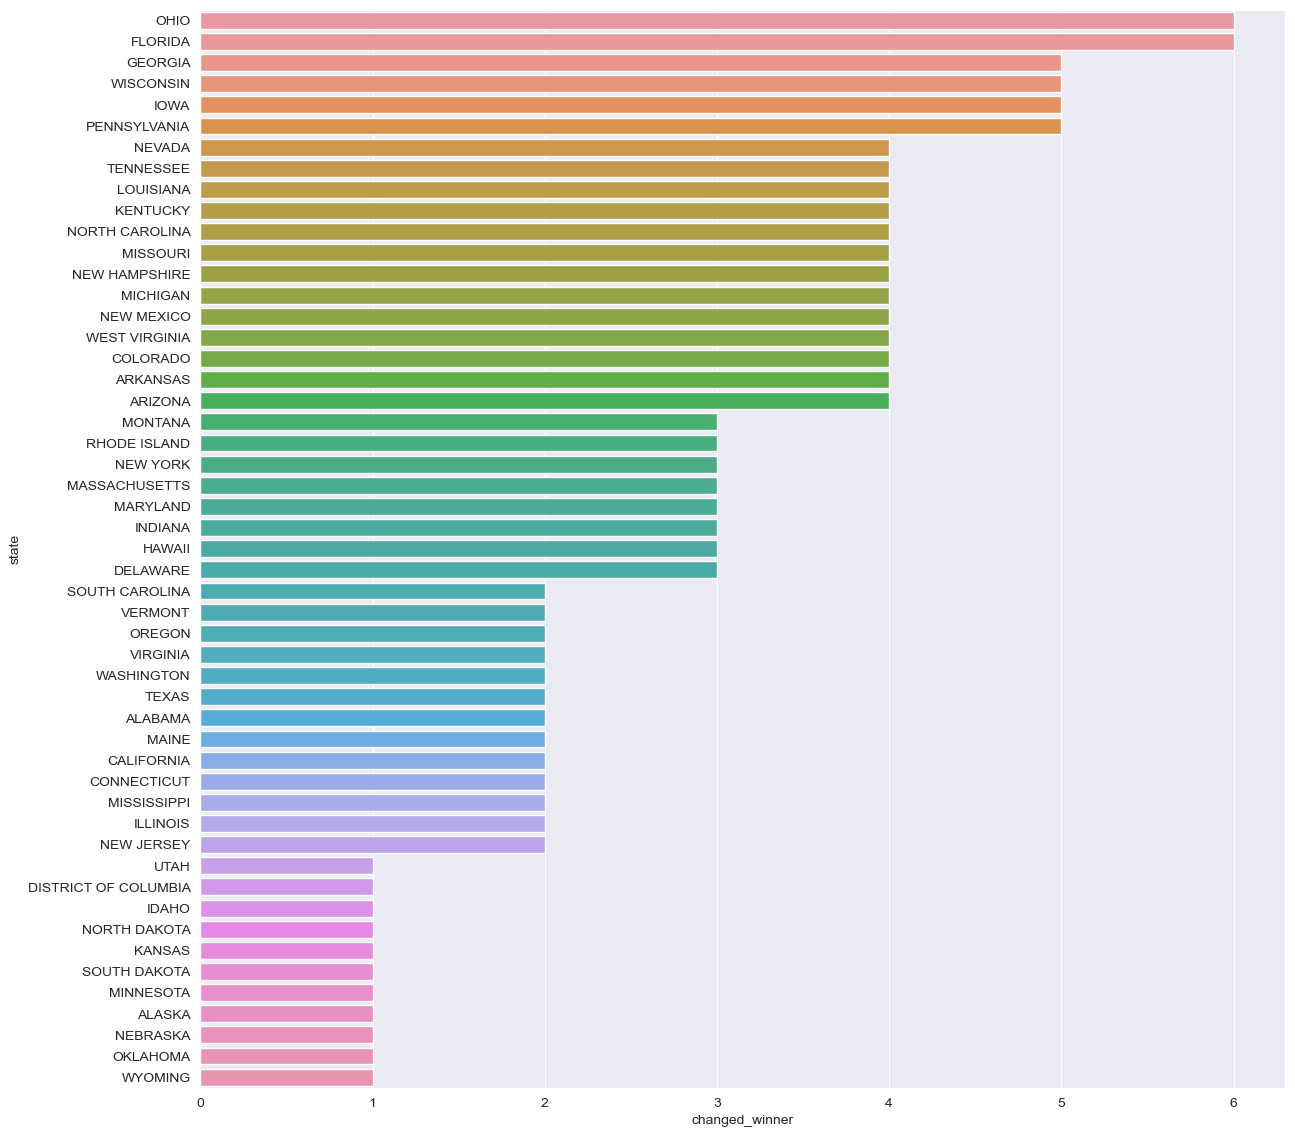

In [219]:
# Visualization of results

sns.set_style('darkgrid')
matplotlib.rcParams['figure.facecolor'] = '#00000000'
#sns.color_palette("Blues", as_cmap=True)

plt.figure(figsize=(14,14))
sns.barplot(x = 'changed_winner', y = 'state', data = p_data_g1)

In [220]:
# States with most republican wins (1976 - 2020)

p_data_g2 = p_data.groupby(['state'])[['rep_win']].sum().reset_index().copy()
p_data_g2 = p_data_g2.sort_values(by='rep_win', ascending=False).reset_index(drop = True)
# p_data_g2

<Axes: xlabel='rep_win', ylabel='state'>

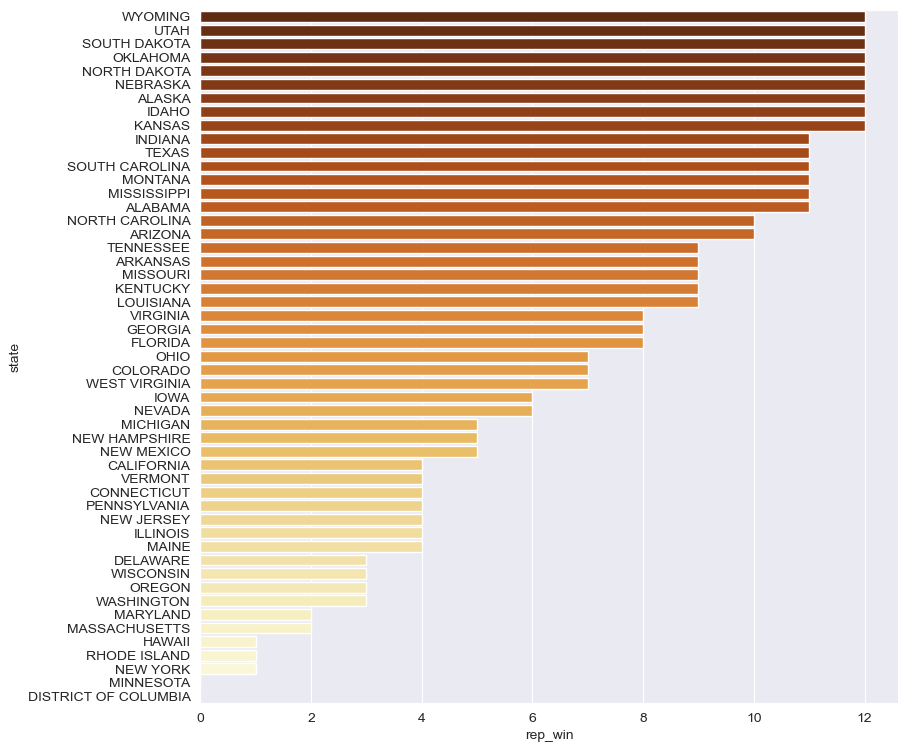

In [221]:
plt.figure(figsize=(9,9))
sns.barplot(x = 'rep_win', y = 'state', data = p_data_g2, palette = 'YlOrBr_r')

<Axes: xlabel='dem_win', ylabel='state'>

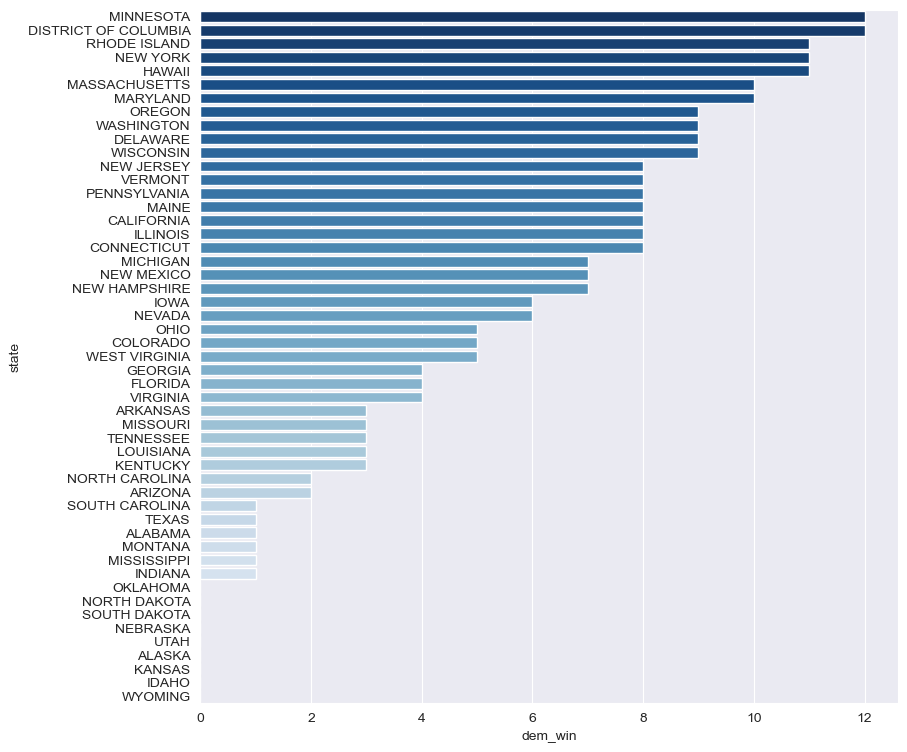

In [222]:
# States with most democrat wins (1976 - 2020)

p_data_g3 = p_data.groupby(['state'])[['dem_win']].sum().reset_index().copy()
p_data_g3 = p_data_g3.sort_values(by='dem_win', ascending = False).reset_index(drop = True)

plt.figure(figsize=(9,9))
sns.barplot(x = 'dem_win', y = 'state', data = p_data_g3, palette = 'Blues_r')

In [223]:
# States that changed winner form 2012 to 2016

changed_2016 = p_data[(p_data.year == 2016) & (p_data.changed_winner == True)]
changed_2016 = changed_2016.reset_index(drop = True)
changed_2016[['state']]

,state
0,FLORIDA
1,IOWA
2,MICHIGAN
3,OHIO
4,PENNSYLVANIA
5,WISCONSIN


In [224]:
# States that changed winner form 2016 to 2020

changed_2020 = p_data[(p_data.year == 2020) & (p_data.changed_winner == True)]
changed_2020 = changed_2020.reset_index(drop = True)
changed_2020[['state']]

,state
0,ARIZONA
1,GEORGIA
2,MICHIGAN
3,PENNSYLVANIA
4,WISCONSIN


In [225]:
# More data from 2020

p_data_2020 = p_data[(p_data.year == 2020)]
p_data_2020 = p_data_2020[['state', 'party_winner', 'victory_percentage']].reset_index(drop = True)
p_data_2020

,state,party_winner,victory_percentage
0,ALABAMA,REPUBLICAN,62.031643
1,ALASKA,REPUBLICAN,52.833143
2,ARIZONA,DEMOCRAT,49.364691
3,ARKANSAS,REPUBLICAN,62.395730
4,CALIFORNIA,DEMOCRAT,63.483947
5,COLORADO,DEMOCRAT,55.011067
6,CONNECTICUT,DEMOCRAT,59.260732
7,DELAWARE,DEMOCRAT,58.743006
8,DISTRICT OF COLUMBIA,DEMOCRAT,92.149694
9,FLORIDA,REPUBLICAN,51.219820


In [226]:
# Biggest Repuplican wins in 2020 (10)

rw_2020 = p_data_2020[(p_data_2020.party_winner == 'REPUBLICAN')]
rw_2020 = rw_2020.sort_values(by='victory_percentage', ascending = False).reset_index(drop = True).head(10)
rw_2020

,state,party_winner,victory_percentage
0,WYOMING,REPUBLICAN,69.499790
1,WEST VIRGINIA,REPUBLICAN,68.631552
2,OKLAHOMA,REPUBLICAN,65.373272
3,NORTH DAKOTA,REPUBLICAN,65.114049
4,IDAHO,REPUBLICAN,63.837565
5,ARKANSAS,REPUBLICAN,62.395730
6,KENTUCKY,REPUBLICAN,62.086572
7,ALABAMA,REPUBLICAN,62.031643
8,SOUTH DAKOTA,REPUBLICAN,61.769390
9,TENNESSEE,REPUBLICAN,60.660294


In [227]:
# Biggest Democrat wins in 2020 (10)

dw_2020 = p_data_2020[(p_data_2020.party_winner == 'DEMOCRAT')]
dw_2020 = dw_2020.sort_values(by='victory_percentage', ascending = False).reset_index(drop = True).head(10)
dw_2020

,state,party_winner,victory_percentage
0,DISTRICT OF COLUMBIA,DEMOCRAT,92.149694
1,VERMONT,DEMOCRAT,65.455781
2,MARYLAND,DEMOCRAT,65.360665
3,MASSACHUSETTS,DEMOCRAT,65.122984
4,CALIFORNIA,DEMOCRAT,63.483947
5,HAWAII,DEMOCRAT,63.149380
6,NEW YORK,DEMOCRAT,60.391885
7,RHODE ISLAND,DEMOCRAT,59.476199
8,CONNECTICUT,DEMOCRAT,59.260732
9,DELAWARE,DEMOCRAT,58.743006


In [228]:
# Closest races

cr_2020 = p_data_2020.sort_values(by='victory_percentage', ascending = True).reset_index(drop = True).head(10)
cr_2020

,state,party_winner,victory_percentage
0,ARIZONA,DEMOCRAT,49.364691
1,WISCONSIN,DEMOCRAT,49.449537
2,GEORGIA,DEMOCRAT,49.473056
3,NORTH CAROLINA,REPUBLICAN,49.934332
4,PENNSYLVANIA,DEMOCRAT,50.008496
5,NEVADA,DEMOCRAT,50.056782
6,MICHIGAN,DEMOCRAT,50.620818
7,FLORIDA,REPUBLICAN,51.219820
8,TEXAS,REPUBLICAN,52.057604
9,MINNESOTA,DEMOCRAT,52.395099


In [229]:
# How many of this corresponds to the most changed table

mc_states = p_data_g1.head(10)
mc_states = mc_states.state

cr_2020['most_changed'] = mc_states
corr = cr_2020[['state', 'most_changed']].copy()
corr['correspond'] = corr['state'].isin(corr['most_changed'])
corr

,state,most_changed,correspond
0,ARIZONA,OHIO,False
1,WISCONSIN,FLORIDA,True
2,GEORGIA,GEORGIA,True
3,NORTH CAROLINA,WISCONSIN,False
4,PENNSYLVANIA,IOWA,True
5,NEVADA,PENNSYLVANIA,True
6,MICHIGAN,NEVADA,False
7,FLORIDA,TENNESSEE,True
8,TEXAS,LOUISIANA,False
9,MINNESOTA,KENTUCKY,False


In [235]:
filter_1 = (corr.correspond == True)
filter_1 = corr[filter_1].reset_index( drop = True)
filter_1 = filter_1[['state']]
filter_1

,state
0,WISCONSIN
1,GEORGIA
2,PENNSYLVANIA
3,NEVADA
4,FLORIDA
